# 9. Tutorial 6: Basic Numerical Methods

#### Naoki TANI
#### Center for Advanced Policy Studies (CAPS), Institute of Economic Research, Kyoto University
#### June 7, 2023

In [1]:
using Pkg
#Pkg.add("_")

In [2]:
using Plots
#using DataFrames
#using Random
#using CSV
#using Dates
#using Statistics
#using Downloads
using ForwardDiff
using Optim
using Symbolics

## 1. Derivatives

#### In this section, we will look at basic differential techniques that relate to economic modeling. 
#### Suppose  $f$ is a function of a single variable $x$. Its derivative at any point $x$ is the slope of the tangent line to the function $f$ at the point $(x, f(x))$ and it is defined as,

#### $$
f'(x) = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h}
$$

#### Let me give you an example of the quadratic utility function: $u(x) = x - \frac{1}{10}x^2$

In [3]:
# define the function u(x) and a small value of h
u(x) = 
h = 1.0e-10

# the simple approximation of the first derivative
ud(x) = 

ud (generic function with 1 method)

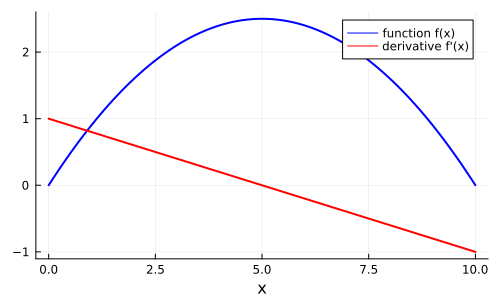

In [4]:
x = range(0, 10, length = 100)
Plots.plot(x,
    [u.(x) ud.(x)],
    xlabel     = "x",
    #ylabel     = "",
    #title      = "",
    label      = ["function f(x)" "derivative f'(x)"],
    linecolor  = [:blue :red],
    linewidth  = 2, 
    #linestyle  = [:solid :dash],
    size       = (500,300), 
    legend     = :topright,
)

## 2. ForwardDiff

#### Here we use an automatic differentiation package `ForwardDiff`.

In [5]:
ufd(x) = ForwardDiff.derivative(u,x)

ufd (generic function with 1 method)

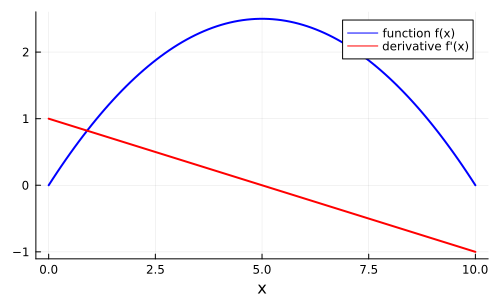

In [6]:
x = range(0, 10, length = 100)
Plots.plot(x,
    [u.(x) ufd.(x)],
    xlabel     = "x",
    #ylabel     = "",
    #title      = "",
    label      = ["function f(x)" "derivative f'(x)"],
    linecolor  = [:blue :red],
    linewidth  = 2, 
    #linestyle  = [:solid :dash],
    size       = (500,300), 
    legend     = :topright,
)

## 3. Single-Variable Gradient Method

#### Gradient method is a technique for maximizing or minimizing differentiable functions. The idea is that we take an initial guess as to what the maximam or minimum is, and then repeatedly update guesses by using the gradient.

#### $$x_{n+1} = x_{n} + \eta f'(x_{n})$$
#### where $x_n$ is our $n$-th guess and $x_{n+1}$ is the next guess. We start from the initial guess $x_1$ and iterate the process until the maximum number of iterations. $f′(x_n)$ tells us whether the function is increasing or decreasing at the point $x_{n}$ as well as how steep the function is. $\eta$ is the learning rate which is a positive constant value and corresponds to the amount by which we update our guess. 

In [7]:
function gradient_method(f, x_init, η, iter)

    
    
    
end

gradient_method (generic function with 1 method)

In [8]:
x_seq=gradient_method(u, 2.5, 0.1, 1000)

1000-element Vector{Float64}:
 2.5
 2.55
 2.5989999999999998
 2.64702
 2.6940796
 2.7401980079999997
 2.7853940478399997
 2.8296861668832
 2.873092443545536
 2.9156305946746253
 2.9573179827811327
 2.99817162312551
 3.0382081906629996
 ⋮
 4.9999999946383
 4.999999994745534
 4.999999994850623
 4.999999994953611
 4.999999995054539
 4.999999995153448
 4.99999999525038
 4.999999995345372
 4.999999995438465
 4.999999995529696
 4.999999995619102
 4.99999999570672

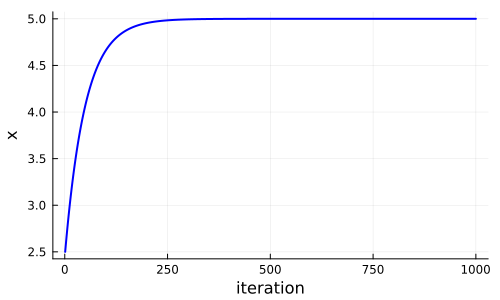

In [9]:
x = range(0, 10000, length = 100)
Plots.plot(1:1000,
    [x_seq],
    xlabel     = "iteration",
    ylabel     = "x",
    #title      = "",
    #label      = ["function f(x)" "derivative f'(x)"],
    linecolor  = [:blue :red],
    linewidth  = 2, 
    #linestyle  = [:solid :dash],
    size       = (500,300), 
    legend     = :none,#:topright,
)

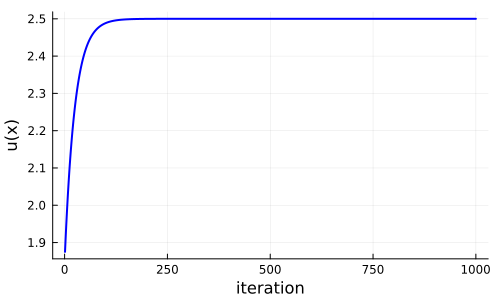

In [10]:
x = range(0, 10000, length = 100)
Plots.plot(1:1000,
    [u.(x_seq)],
    xlabel     = "iteration",
    ylabel     = "u(x)",
    #title      = "",
    label      = ["function f(x)" "derivative f'(x)"],
    linecolor  = [:blue :red],
    linewidth  = 2, 
    #linestyle  = [:solid :dash],
    size       = (500,300), 
    legend     = :none,#:topright,
)

#### We can solve the same optimization problem by using `Optim.jl`.

In [11]:
u(x) = -(x[1] - 1/10 * x[1]^2)
x_init = [2.5] #need to define as a vector
res = optimize(u, x_init, method=GradientDescent())
Optim.minimizer(res)

1-element Vector{Float64}:
 4.999999999985548

## 4. Constrained optimization

#### Now we discuss a constrained optimiation problem.
#### $$\min_{x}\quad 2x^2 - 3xy - 2x + 3y^2 - 2y$$
#### $$\text{subject to}\quad 2x - y = 0$$

#### The Lagragian is,
#### $$\mathcal{L}(x,y,\lambda) = 2x^2 - 3xy - 2x + 3y^2 - 2y - \lambda(2x-y)$$
#### In order to solve the problem, we have to compute the gradient with respect to $x$, $y$, $\lambda$ and set them to zero.

In [12]:
# define variables
@variables x y λ

3-element Vector{Num}:
 x
 y
 λ

In [13]:
# define the lagrangian
L = 2*x^2 - 3*x*y - 2*x + 3*y^2 - 2*y - λ*(2*x - y)

2(x^2) + 3(y^2) - 2x - 2y - λ*(2x - y) - 3x*y

In [14]:
# calcurate partial derivatives
dx = Differential(x)
dy = Differential(y)
dλ = Differential(λ)

(::Differential) (generic function with 3 methods)

In [15]:
expand_derivatives(dx(L))

4x - 2 - 3y - 2λ

In [16]:
expand_derivatives(dy(L))

λ + 6y - 2 - 3x

In [17]:
expand_derivatives(dλ(L))

y - 2x

#### Now, we get three equations with three unknown varibales.
#### $$4x - 3y - 2\lambda=2$$
#### $$3x - 6y - \lambda=2$$
#### $$-2x+y=0$$

#### The system of equations can be written in the matrix as,
#### $$
\left[
\begin{matrix} 4 & -3 & -2 \\ 3 & -6 & -1 \\ -2 & 1 & 0\end{matrix}
\right]
\left[
\begin{matrix} x \\ y \\ \lambda\end{matrix}
\right]
=
\left[
\begin{matrix} 2 \\ 2 \\ 0 \end{matrix}
\right]
$$

In [18]:
A = [4 -3 -2; 3 -6 -1; -2 1 0]
b = [2; 2; 0]

3-element Vector{Int64}:
 2
 2
 0

In [24]:
minimizer = A\b

3-element Vector{Float64}:
 -0.125
 -0.25
 -0.875

In [20]:
x = range(-5, 5 ,length = 100)
y = range(-5, 5 ,length = 100)

-5.0:0.10101010101010101:5.0

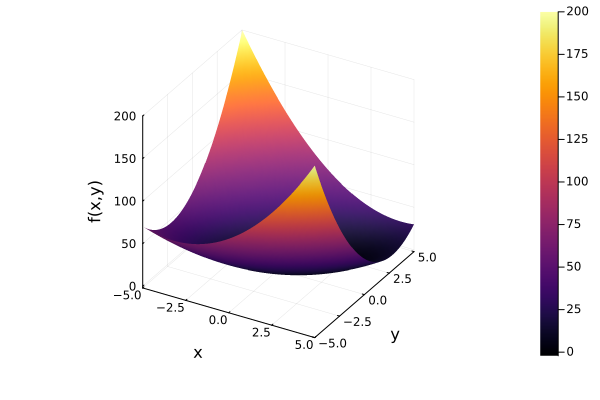